# Independent Samples $t$-Test with Unequal Variances (Welch’s $t$-Test)

**Summary**: This notebook illustrates a two-sided independent samples $t$-test to assess whether two populations have equal mean pairwise correlations.

In [3]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from sim_data import get_sim_data

# I. Simulating a Dataset from Random Samples

The t-test can examine two types of comparisons: whether two populations have equal means, a two-sided test, or if one of the population means is greater than or equal to the other, a one-sided test. 
Here, we use the **two-sided independent samples t-test** to test whether two populations have equal mean pairwise correlations.  
  
- **Null Hypothesis ($H_0$)**: Population 1 and Population two have the same mean.
    - $\mu_1 - \mu_2 = 0$
- **Alternative Hypothesis ($H_1$)**: Population 1 and Population two do not have the same mean.
    - $\mu_1 - \mu_2 \neq 0$

The t-test follows three assumptions: the populations are independent, each population’s data is normally distributed, and the data within each population are independent.  
We generate two datasets, x1 and x2, of different sample sizes n1 and n2, under these assumptions by randomly sampling from two different normal distributions with unequal variances.

In [4]:
#Import Simulated Data (Will take a while to run)
data = get_sim_data()

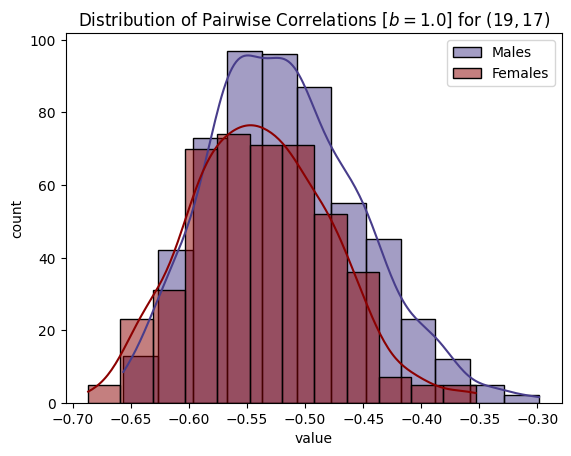

In [176]:
# param = 1.0
separable_data = data[-1]
separable_data_m = separable_data.loc[separable_data.gender == 'M']
separable_data_f = separable_data.loc[separable_data.gender == 'F']

# population 1
n1 = 500 # arbitrary sample size
# population 2
n2 = 450 # arbitrary sample size

# generate two samples of different sample sizes
np.random.seed(1234)
# pairwise region
i = 19
j = 17 
# get random pairwise reigon
m_region = separable_data_m['corr'].apply(lambda netmat: netmat[i][j]) # 500 pairwise correlations at region [i, j]
f_region = separable_data_f['corr'].apply(lambda netmat: netmat[i][j]) # 500 pairwise correlations at region [i, j]
s1 = np.random.choice(m_region, n1)
s2 = np.random.choice(f_region, n2)

# plot the two samples
bins = 12
ax = sns.histplot(s1, kde=True, bins=bins, label="Males", alpha=0.5, color="darkslateblue")
ax = sns.histplot(s2, kde=True, bins=bins, label="Females", alpha=0.5, color="darkred")
ax.set(xlabel='value', ylabel='count', title=f'Distribution of Pairwise Correlations [$b=1.0$] for ${(i, j)}$')
plt.legend()
plt.show()

# II. Calculating the $t$-Statistic and p-value

To calculate the t-statistic, we compare the sample means and calculate the estimated overall standard error of the difference between the sample means, as follows: 

In [177]:
ss = lambda data: np.sum((data - np.mean(data))**2) # sum of squared errors
var = lambda data: ss(data) / (len(data) - 1) # sample variance
sqse = lambda data: var(data) / len(data) # squared standard error 

sqse1 = sqse(s1) # squared standard error of sample 1
sqse2 = sqse(s2) # aquared standard error of sample 2
diff_means = np.mean(s1) - np.mean(s2) # get difference of means
t_stat = diff_means / np.sqrt(sqse1 + sqse2) # calculate t-score
t_stat

5.279540510869574

Using the t-ditribution the t-statistic yields a p-value that, under a given significane level ($\alpha$ = 0.05), allows us to reject or fail to reject the null hypothesis.

In [178]:
dof = n1 + n2 - 2 # degrees of freedom
pval = (1 - t.cdf(np.abs(t_stat), dof))* 2 # p-value using the t-distribution
pval

1.5891938143219875e-07

In [180]:
print(f"Here, our t-statistic yields a p-value of {pval}, which means we fail to reject the null hypothesis that our two populations have the equal mean pairwise correlations.")

Here, our t-statistic yields a p-value of 1.5891938143219875e-07, which means we fail to reject the null hypothesis that our two populations have the equal mean pairwise correlations.


# Multiple Hypothesis t-Test and Bonferroni Correction 